<h1 align='center'>Exploring Boston's Airbnb Trends🏘️🏡</h1>

# Introduction

Boston, a city steeped in history and renowned for its iconic landmarks and bustling neighborhoods, attracts visitors from around the globe. Whether you're drawn to its historic sites, cultural institutions, or thriving culinary scene, Boston offers a wealth of experiences to explore. For those navigating the world of short-term rentals, understanding the intricacies of the Airbnb market in Boston is crucial.

This project adheres to the CRISP-DM framework, a widely-used methodology in data mining and analytics. The CRISP-DM framework consists of the following key steps:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

## About the data:
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

## Table of content:
    1) Business Understanding
    2) Exploratory Data Analysis (EDA)
    3) Data Preprocessing
        - Change data type
        - Handling missing values
        - Encoding categorical columns
    4) Answering Business Questions
        
### Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found <a href='http://insideairbnb.com/get-the-data/'>here</a>


# Business Understanding

This analysis aims to explore crucial aspects of the Airbnb market in Boston by addressing three fundamental questions:

1. **Identifying Popular Neighborhoods**
2. **Factors Affecting Airbnb Prices**
3. **Analyzing Seasonal Price and Availability Trends**

To answer these questions, we will utilize data from the listings and calendar datasets, which contain comprehensive information about Airbnb listings in Boston, including property details, pricing, availability, and location attributes. Through thorough analysis and modeling, we aim to derive actionable insights to benefit both hosts and guests in the Boston Airbnb market.

# Import Needed Libraries 

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Data

In [2]:
df = pd.read_csv("listings.csv")
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


# Exploratory Data Analysis (EDA)


**How many rows & columns in our dataset:**

In [3]:
# Print the number of rows and columns in the DataFrame
print('There are {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

There are 3585 rows and 95 columns.


**Check the null values:**

In [4]:
# Calculate total number of missing values for each column
total = df.isnull().sum().sort_values(ascending=False)

# Calculate percentage of missing values for each column
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

# Concatenate total and percentage missing values into a single DataFrame
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the top 60 rows of the missing data DataFrame
missing_data.head(60)

,Total,Percent
has_availability,3585,1.000000
license,3585,1.000000
neighbourhood_group_cleansed,3585,1.000000
jurisdiction_names,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473


# Data Preprocessing

## 1- Change data type
We need to clean the data that contains different symbols, such as '%' and '$', and change its type accordingly.

The following columns contain symbols that need to be cleaned:

    - host_response_rate > '%'
    - host_acceptance_rate  > '%'
    - price > "$"
- cleaning_fee > "$"
    - extra_people > "$"

In [5]:
# Specify the columns to be processed
cols = ['host_response_rate', 'host_acceptance_rate', 'price', 'cleaning_fee', 'extra_people']
for col in cols:
    # Extract numeric values from each column using regular expression and convert the extracted values to numeric data type
    df[col] = df[col].str.extract('(\d+)')
    df[col] = pd.to_numeric(df[col])

In [6]:
# Extract the number of amenities 
df['n_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))

## 2- Handling the missing values

Since the dataset contains a significant proportion of missing values, we have chosen to drop columns with 30% or more missing values to prevent generating misleading data. Additionally, we are removing irrelevant columns that will not be used in our analysis or model to avoid any unnecessary distractions.

### Dropping columns with missing values >= 30%

In [7]:
df=df.drop(columns=df.columns[(df.isnull().sum()/df.isnull().count())>=0.30])

In [8]:
print('There are {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

There are 3585 rows and 80 columns.


### Drop useless columns

In [9]:
dropcol=['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
'space', 'description', 'experiences_offered', 'thumbnail_url',
'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
'host_name', 'host_since', 'host_location', 'host_response_time',
'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 
'smart_location', 'country_code', 'country', 'latitude', 'longitude',
'amenities', 'calendar_updated','calendar_last_scraped', 'first_review', 
'last_review', 'requires_license', 'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']
    
df.drop(dropcol, axis=1, inplace=True)

## Impute the missing values

We will impute the missing values in the dataset for numerical variables using the mean, as we found that the mean has the lowest impact on the standard deviation after applying different methods. For categorical variables, we will use mode imputation.

In [10]:
df[df.columns[df.isnull().any()]].describe()

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3114.000000,3114.000000,3571.000000,3575.000000,3576.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,94.989082,84.173089,1.221647,1.255944,1.609060,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,12.517686,21.779254,0.501487,0.753060,1.011745,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,97.000000,71.000000,1.000000,1.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,100.000000,94.000000,1.000000,1.000000,1.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,100.000000,100.000000,1.000000,2.000000,2.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,100.000000,100.000000,6.000000,5.000000,16.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


### Categorical Imputation:

In [11]:
#Fill missing values in the 'property_type' column with the mode value.
df.property_type.fillna(df.property_type.mode().iloc[0], inplace=True)

In [12]:
# Print information about columns containing missing values
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           3114 non-null   float64
 1   host_acceptance_rate         3114 non-null   float64
 2   bathrooms                    3571 non-null   float64
 3   bedrooms                     3575 non-null   float64
 4   beds                         3576 non-null   float64
 5   review_scores_rating         2772 non-null   float64
 6   review_scores_accuracy       2762 non-null   float64
 7   review_scores_cleanliness    2767 non-null   float64
 8   review_scores_checkin        2765 non-null   float64
 9   review_scores_communication  2767 non-null   float64
 10  review_scores_location       2763 non-null   float64
 11  review_scores_value          2764 non-null   float64
 12  reviews_per_month            2829 non-null   float64
dtypes: float64(13)
mem

### Numerical Imputation

In [13]:
#Fill missing values in the DataFrame with the mean value of the entire DataFrame.
df.fillna(df.mean().iloc[0], inplace=True)

In [14]:
#Checking the missing values in the DataFrame
df.isna().sum()

id                                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness   

## Encoding categorical columns


We will encode the categorical columns in the dataset using techniques such as one-hot encoding(get dummies) or mapping the boolean values to (0/1).

In [15]:
#Select columns of object data type in the DataFrame.
df.select_dtypes(include=['object']).columns

Index(['host_is_superhost', 'neighbourhood_cleansed', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'instant_bookable'],
      dtype='object')

In [16]:
def map_boolean_columns(df, columns):
    """
    Map boolean values to integers (True: 1, False: 0) for the given columns in a DataFrame.
    
    Input:
    df (DataFrame): The DataFrame containing the columns to be mapped.
    columns (list): A list of column names to be mapped.
    
    Output:
    df_mapped (DataFrame): The DataFrame with the specified columns mapped.
    """
    mapping = {'t': 1, 'f': 0}
    df_mapped = df.copy()  # Create a copy of the DataFrame to avoid modifying the original DataFrame
    
    for column in columns:
        df_mapped[column] = df_mapped[column].map(mapping)
    
    return df_mapped

In [17]:
columns_to_map = ['is_location_exact', 'instant_bookable', 'host_is_superhost']

# Encode the specified columns
df = map_boolean_columns(df, columns_to_map)

In [18]:
def encode_and_drop_columns(df, columns):
    """
    Encode the specified columns in the DataFrame using one-hot encoding
    and drop the original columns.
    
    Input:
    df (DataFrame): The DataFrame containing the columns to be encoded.
    columns (list): A list of column names to be encoded and dropped.
    
    Output:
    df_encoded (DataFrame): The DataFrame with the specified columns encoded and dropped.
    """
    # Iterate over each column
    for column_name in columns:
        # Perform one-hot encoding on the specified column
        encoded_column = pd.get_dummies(df[column_name], prefix=column_name)
        
        # Concatenate the encoded columns with the original DataFrame
        df = pd.concat([df, encoded_column], axis=1)
        
        # Drop the original column
        df.drop(column_name, axis=1, inplace=True)
    
    return df

In [19]:
columns_to_encode = ['bed_type', 'room_type', 'property_type']

# Encode the specified columns and drop them
df = encode_and_drop_columns(df, columns_to_encode)

# Business Questions

Now that we have cleaned the listing dataset, we are equipped to analyze it to address the first two questions.

By analyzing the cleaned listing data using appropriate techniques, we can gain insights into the popularity of neighborhoods and the factors driving Airbnb prices in Boston. This analysis will provide valuable information for hosts to optimize their listings and pricing strategies, as well as for potential guests to make informed decisions when booking accommodations. Let's proceed with the analysis to uncover these insights:

## Q1: What are the most popular neighborhood?

   - To identify popular neighborhoods, we counted the number of listings in each neighborhood from the cleaned data. By sorting neighborhoods based on listing count, we determined the most sought-after areas among Airbnb hosts and guests. This analysis offers valuable insights into the distribution of listings across Boston's neighborhoods.

In [20]:
# Group the data by neighborhood and count the number of listings in each neighborhood
listings_per_neighborhood = df.groupby('neighbourhood_cleansed')['id'].count().reset_index()
listings_per_neighborhood = listings_per_neighborhood.rename(columns={'id': 'listing_count'})

# Sort neighborhoods by listing count in descending order
listings_per_neighborhood = listings_per_neighborhood.sort_values(by='listing_count', ascending=False)

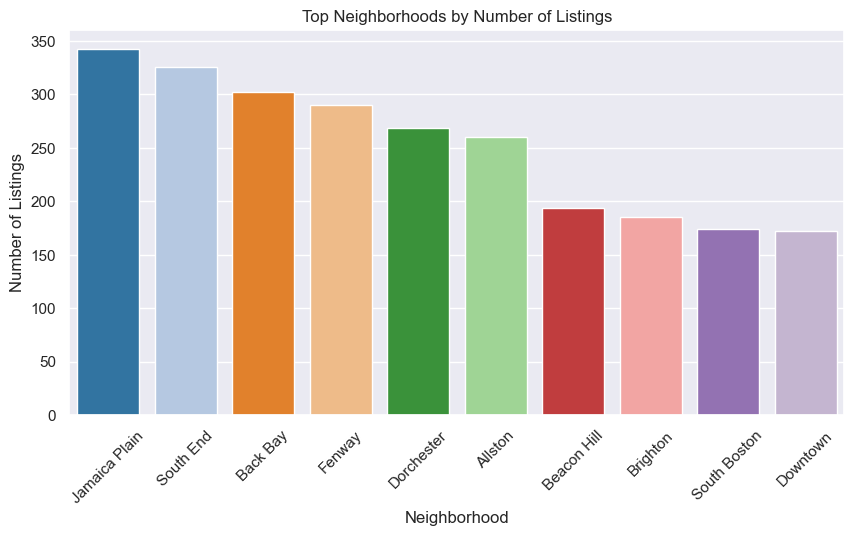

In [57]:
# Plot bar chart for top neighborhoods by listing count
plt.figure(figsize=(10, 5))
sns.set(palette='tab20')
sns.barplot(x='neighbourhood_cleansed', y='listing_count', data=listings_per_neighborhood.head(10))
plt.title('Top Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

plt.show()

The figure above highlights the top neighborhoods in Boston for Airbnb listings, showcasing Jamaica Plain, South End, and Back Bay as the most popular choices. These neighborhoods offer a mix of cultural attractions, historic charm, and convenient access to landmarks. The diversity in the top neighborhoods reflects the varied preferences of Airbnb guests, providing valuable insights for travelers and hosts alike.

After identifying the top neighborhoods for Airbnb listings in Boston, it's crucial to compare the average prices and review scores across these areas. This comparison offers insights into pricing dynamics and guest satisfaction levels, aiding hosts in optimizing their offerings and assisting travelers in making informed decisions.

### How does the average price and review scores compare across these neighborhoods?
   - We analyzed the average price and review scores for each neighborhood by computing their means. This data was merged with the count of listings per neighborhood. Then, we created visualizations to showcase the top neighborhoods based on listing count, displaying their average price and review scores. 

In [22]:
# Calculate average price and review scores for each neighborhood
neighborhood_stats = df.groupby('neighbourhood_cleansed').agg({
    'price': 'mean',
    'review_scores_rating': 'mean'}).reset_index()

In [23]:
# Merge listing count with neighborhood stats
neighborhood_stats = pd.merge(neighborhood_stats, listings_per_neighborhood, on='neighbourhood_cleansed')

# Sort neighborhoods by listing count in descending order
neighborhood_stats = neighborhood_stats.sort_values(by='listing_count', ascending=False)

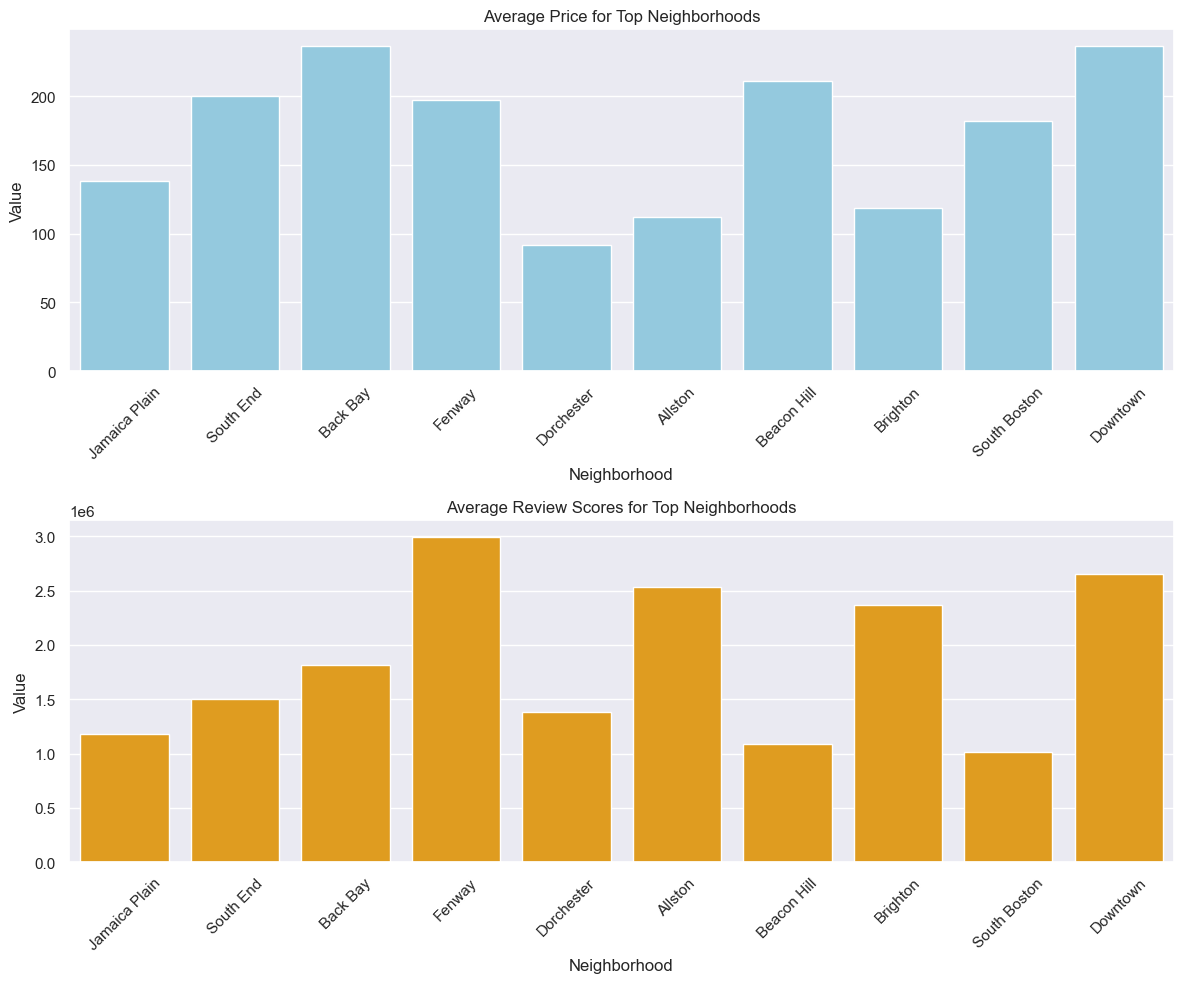

In [24]:
# Set up the visualization
plt.figure(figsize=(12, 10))

# Plot bar chart for average price, review scores, and number of reviews for top neighborhoods
plt.subplot(2, 1, 1)
sns.barplot(x='neighbourhood_cleansed', y='price', data=neighborhood_stats.head(10), color='skyblue', label='Average Price')
plt.title('Average Price for Top Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x='neighbourhood_cleansed', y='review_scores_rating', data=neighborhood_stats.head(10), color='orange', label='Review Scores')
# sns.barplot(x='neighbourhood_cleansed', y='number_of_reviews', data=neighborhood_stats.head(10), color='lightgreen', label='Number of Reviews')
plt.title('Average Review Scores for Top Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The analysis of Airbnb listings in Boston's top neighborhoods reveals a notable correlation between pricing, popularity, and guest satisfaction. The data reveals a diverse landscape where upscale neighborhoods like Back Bay and Downtown command higher prices, likely driven by factors such as proximity to attractions and amenities. Despite their premium rates, these neighborhoods consistently maintain high review scores, indicating a positive correlation between cost and guest satisfaction. Conversely, more affordable neighborhoods like Dorchester and Allston offer competitive pricing, appealing to budget-conscious travelers. However, the wider range of review scores in these areas suggests a more diverse guest experience. Interestingly, neighborhoods like Jamaica Plain and South End strike a balance between popularity and affordability, making them attractive options for travelers seeking both value and desirability. These insights highlight the importance of balancing pricing with guest experience and neighborhood appeal to optimize accommodation offerings and meet traveler expectations.

## Q2: What factors are the most influential in determining Airbnb prices in Boston?

To uncover the most influential factors in determining Airbnb prices in Boston, we will utilize two fundamental techniques: correlation analysis and regression modeling.

### Correlation analysis:

   - We selected relevant features and computed the correlation matrix to identify relationships between them. The heatmap visualization helps us understand which attributes may influence Airbnb prices. This analysis assists hosts in optimizing their listings and pricing strategies.

In [25]:
# Select relevant features and drop rows with missing values
relevant_data = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'n_amenities',
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Entire Floor',
       'property_type_Guesthouse', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Townhouse',
       'property_type_Villa', 'price']]

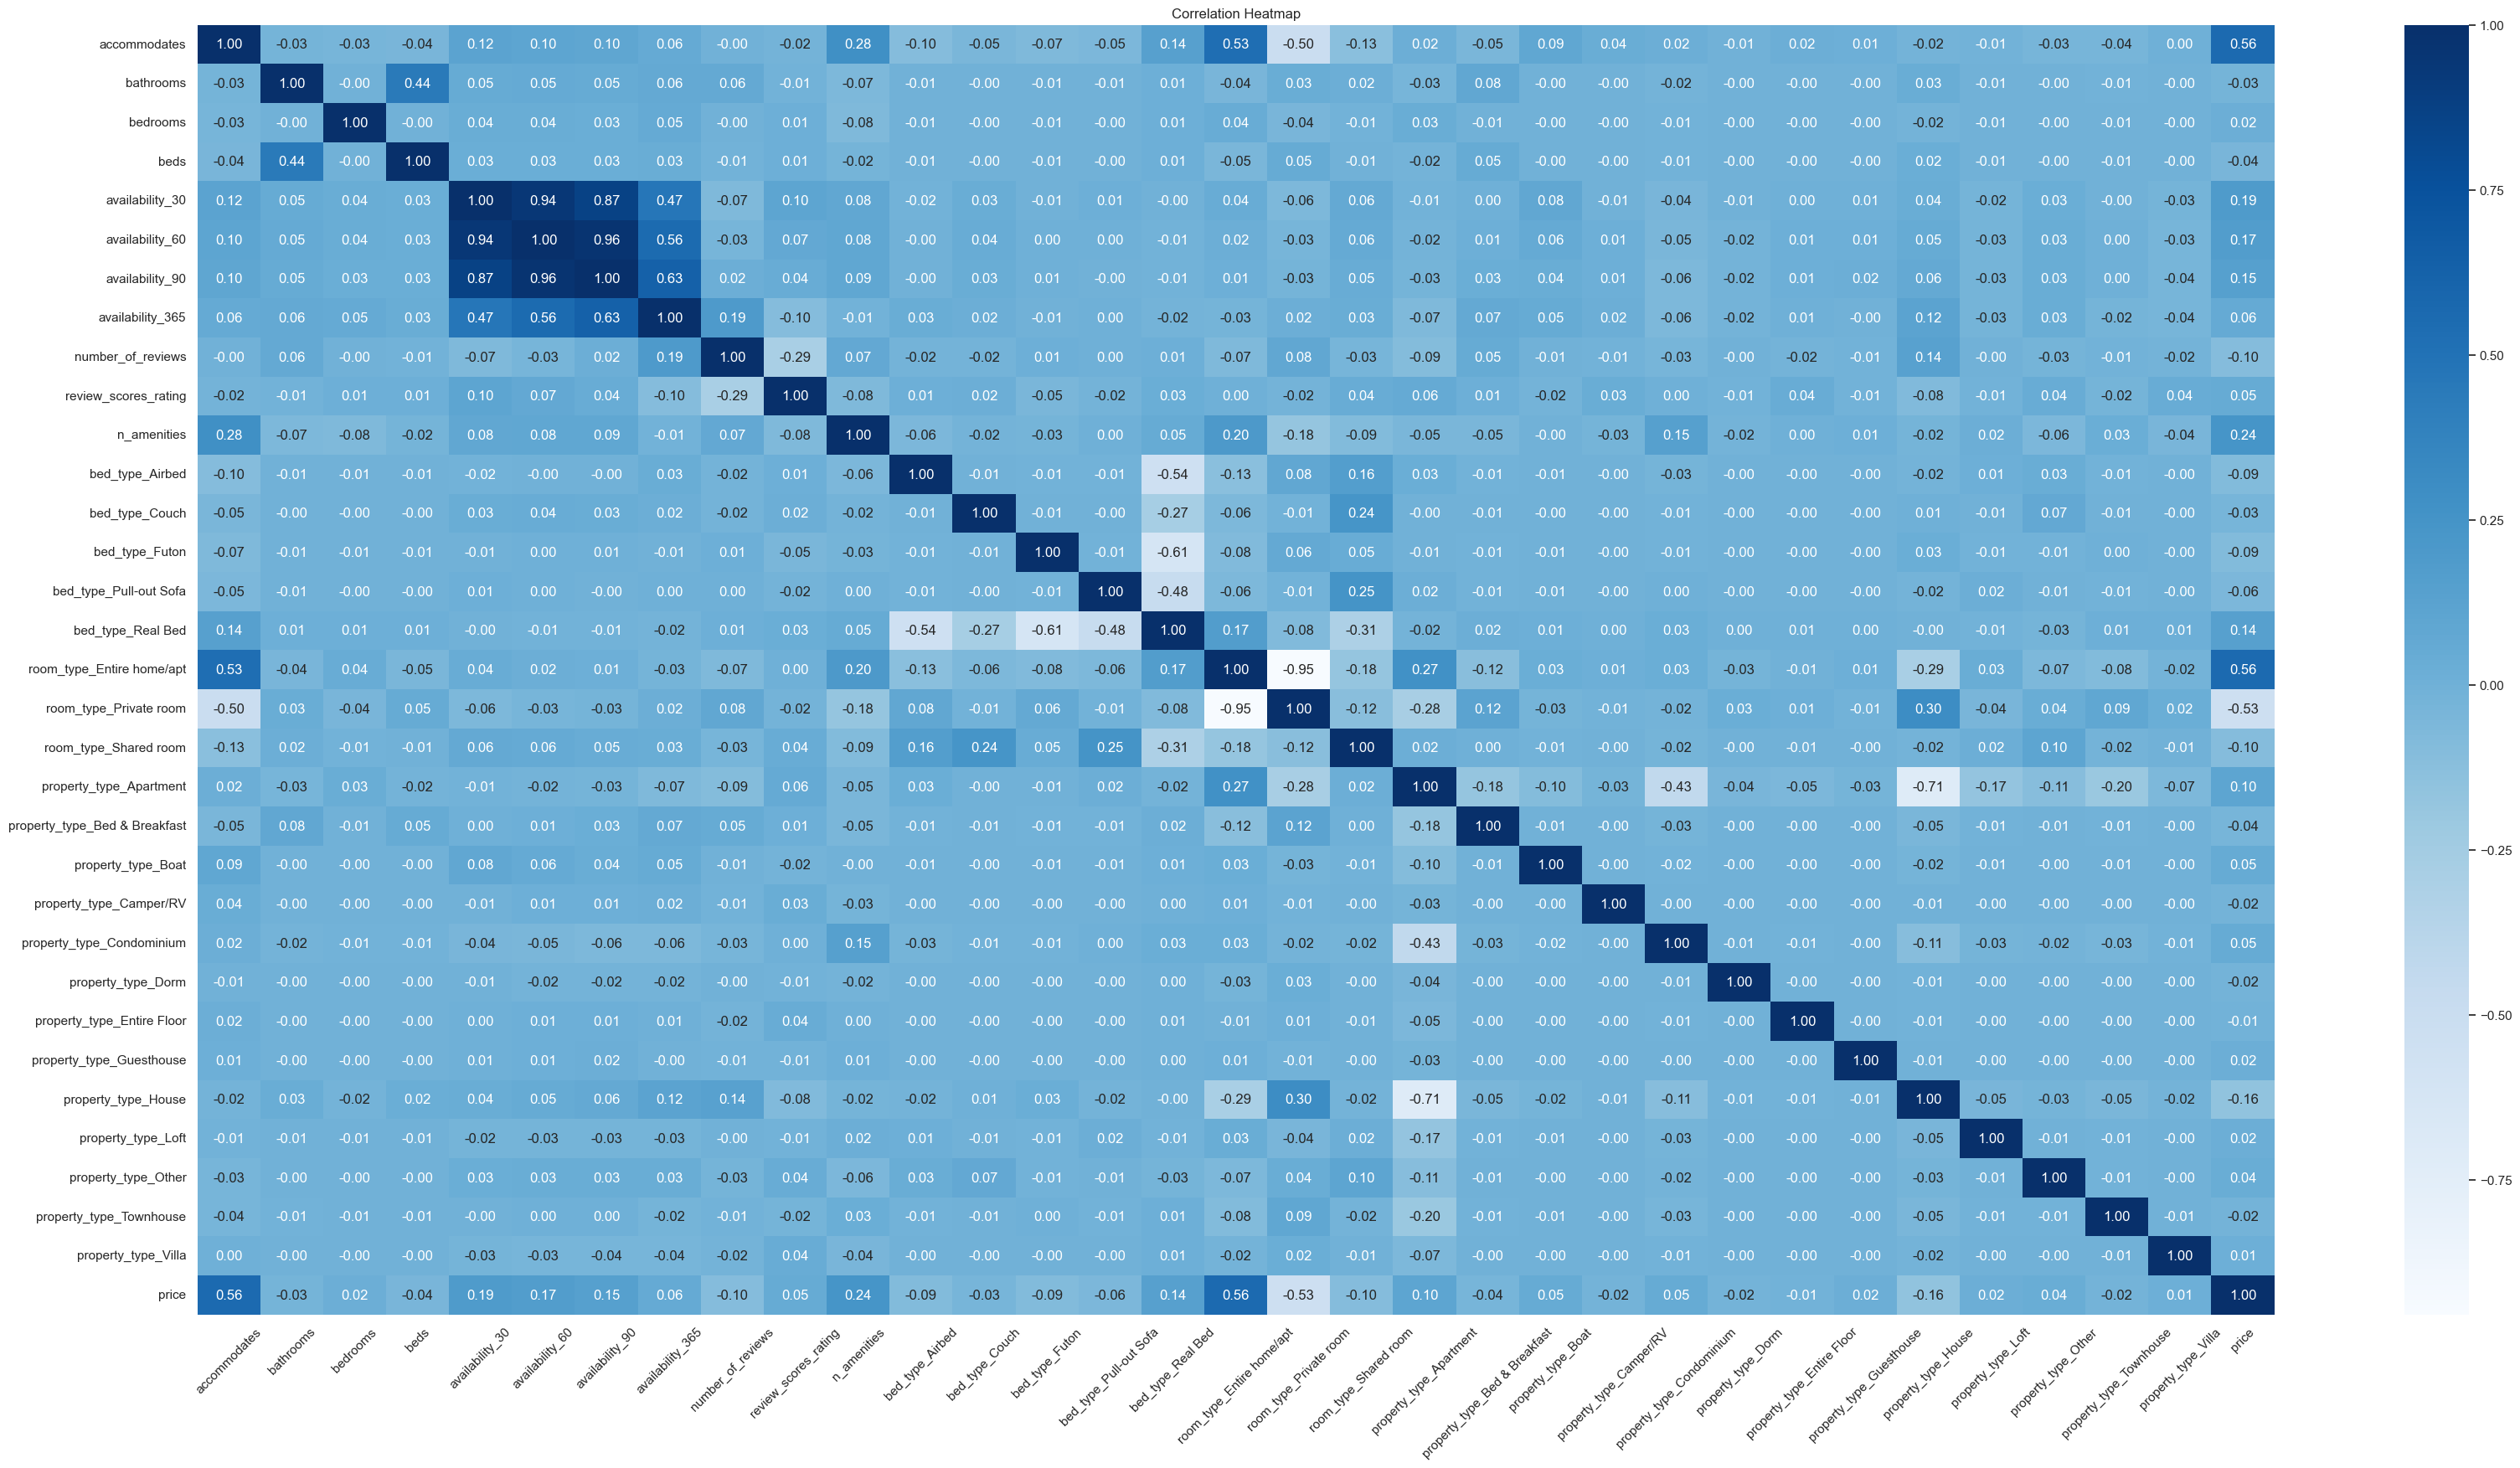

In [26]:
# Compute the correlation matrix
correlation_matrix = relevant_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(40, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")

# Add title and rotate x-axis labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

# Show plot
plt.show()

In examining the correlation matrix between various features and Airbnb prices in Boston, several notable trends emerge.

In terms of positive correlations, factors such as accommodation size ('accommodates') and listing type ('room_type_Entire home/apt') display a strong association with higher prices. This suggests that larger accommodations and entire homes tend to command higher rates. Additionally, moderate positive correlations with price are observed for features like availability ('availability_30', 'availability_60', 'availability_90') and amenities ('n_amenities'), indicating that properties with greater availability and more amenities tend to fetch slightly higher prices.

Conversely, certain features exhibit negative correlations with price. Notably, listings offering private rooms ('room_type_Private room') and certain property types like houses ('property_type_House') display strong negative associations, indicating that these accommodations typically have lower prices compared to entire homes or apartments.

In summary, this analysis underscores the significance of factors such as accommodation size, type, availability, and amenities in influencing Airbnb prices in Boston. Larger and more comprehensive accommodations tend to command higher prices, while listings offering private rooms or specific property types may be associated with lower rates.

### Regression modeling:
   - We split the data into features (X) and the target variable (Y). Then, we trained a Linear Regression model using the features to predict prices. The coefficients of the trained model reveal the most influential factors in determining Airbnb prices in Boston.

In [27]:
# Split data into features and target variable
X = relevant_data.iloc[:,:-1]
Y = relevant_data['price']

In [28]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

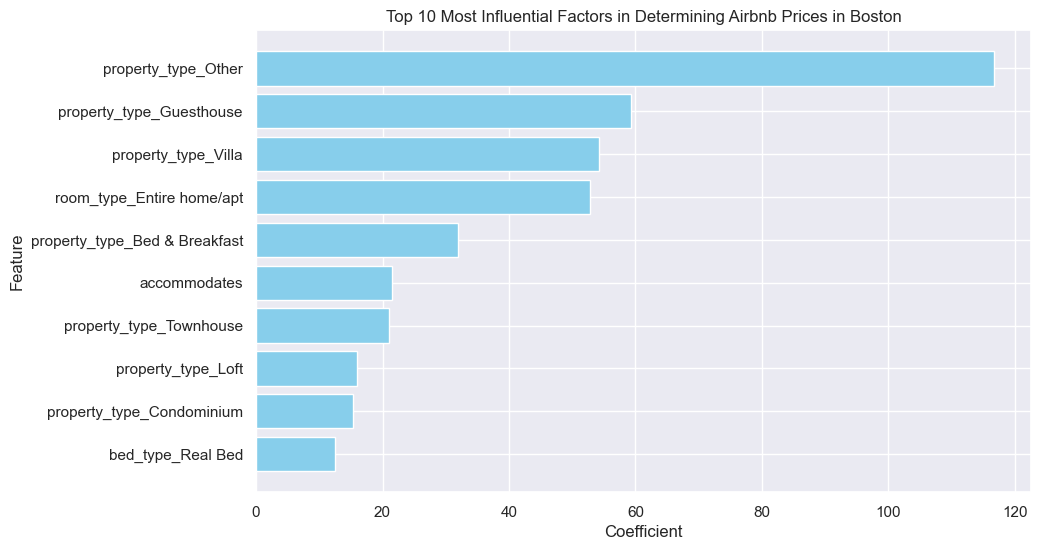

In [53]:
# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Sort coefficients by absolute value
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot top 10 coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'].head(10), coefficients['Coefficient'].head(10), color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Most Influential Factors in Determining Airbnb Prices in Boston')
plt.gca().invert_yaxis()  # Invert y-axis to display highest coefficients on top
plt.show()

The result reveals that property type, particularly unique offerings like 'property_type_Other' and 'property_type_Guesthouse', strongly influence Airbnb prices in Boston. Additionally, entire homes/apartments ('room_type_Entire home/apt') tend to command higher prices compared to other types of accommodations. Furthermore, the capacity of the property ('accommodates') plays a significant role, with larger accommodations correlating with higher prices. Overall, these findings emphasize the importance of property characteristics and room type in determining Airbnb prices in Boston.

## Q3: Do Airbnb listing prices and availability fluctuate based on the season?
   - We loaded the data from "calendar.csv" and processed it to analyze seasonal price and availability trends. After converting date columns to datetime format and prices to float, we grouped the data by season and calculated average price and availability percentages. We visualize these seasonal trends to provide insights into how Airbnb listing prices and availability fluctuate, offering valuable guidance for both hosts and guests in planning their stays.

In [30]:
# Load the data
df = pd.read_csv("calendar.csv")

In [31]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [32]:
# Extract the season information (assuming 4 seasons)
df['season'] = df['date'].dt.month // 3 + 1

In [33]:
# Convert the price column to float after removing commas and dollar sign
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Group data by season and calculate average price and availability
seasonal_stats = df.groupby('season').agg({
    'price': 'mean',
    'available': lambda x: (x == 't').mean() * 100  # Convert to percentage
}).reset_index()

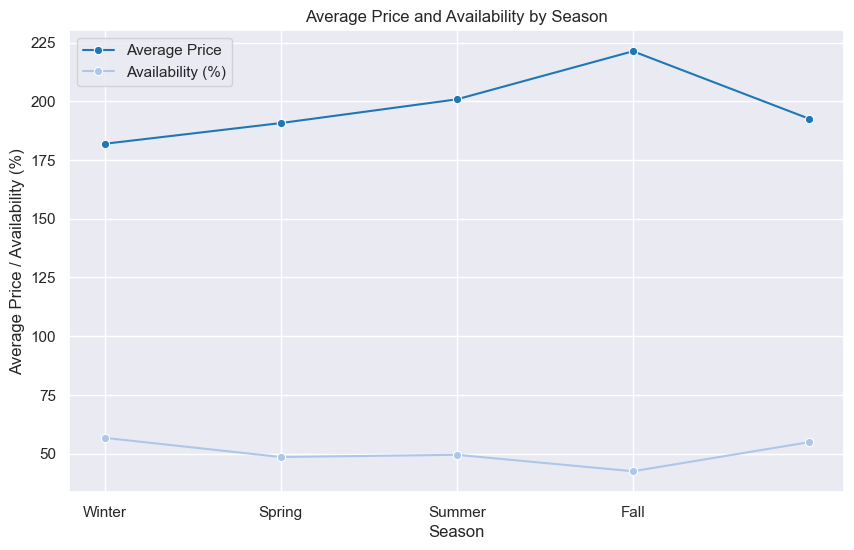

In [34]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_stats, x='season', y='price', marker='o', label='Average Price')
sns.lineplot(data=seasonal_stats, x='season', y='available', marker='o', label='Availability (%)')
plt.title('Average Price and Availability by Season')
plt.xlabel('Season')
plt.ylabel('Average Price / Availability (%)')
plt.xticks(range(1, 5), ['Winter', 'Spring', 'Summer', 'Fall'])
plt.legend()
plt.show()

The result reveals significant seasonal variations in prices and availability. Prices rise from season 1 to 4, peaking in season 4 (Fall), likely due to increased demand during certain periods or special events. Availability also fluctuates, with seasons 1 and 4 having fewer listings compared to seasons 2 and 3. This suggests it may be harder to find accommodations in seasons 1 and 4. The relationship between availability and price follows basic supply and demand principles: when availability is high, prices tend to be lower as hosts compete for bookings, but when availability is low, prices increase due to higher demand. This highlights how supply and demand dynamics influence pricing decisions in the Airbnb market.